In [2]:
# Load layers
from keras.layers import Input, Embedding, Flatten ,Subtract,Concatenate, Dense
from keras.models import Model
from keras.utils import plot_model
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

Using TensorFlow backend.


In [ ]:


# Input layer (from previous exercise)
input_tensor = Input(shape=(1,))

# Create a dense layer
output_layer = Dense(1)

# Connect the dense layer to the input_tensor
output_tensor = output_layer(input_tensor)

# Build the model

model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')


In [ ]:

# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file='model0.png')

# Display the image
data = plt.imread('model0.png')
plt.imshow(data)
plt.show()

In [ ]:

games_tourney=pd.read_csv("games_tourney.csv")
games_tourney_train , games_tourney_test = train_test_split(games_tourney)

In [ ]:
games_tourney_train.shape , games_tourney_test.shape

In [ ]:
# Now fit the model
model.fit(games_tourney_train['seed_diff'], games_tourney_train['score_diff'],
          epochs=1,
          batch_size=128,
          validation_split=0.10,
          verbose=True)

In [ ]:
# Load the X variable from the test data
X_test = games_tourney_test['seed_diff']

# Load the y variable from the test data
y_test = games_tourney_test['score_diff']

# Evaluate the model on the test data
model.evaluate(X_test, y_test)

In [ ]:
games_season=pd.read_csv("games_season.csv")

In [ ]:


# Count the unique number of teams
n_teams = np.unique(games_season['team_1']).shape[0]

# Create an embedding layer
team_lookup = Embedding(input_dim=n_teams,
                        output_dim=1,
                        input_length=1,
                        name='Team-Strength')

In [ ]:
# Create an input layer for the team ID
teamid_in = Input(shape=(1,))

# Lookup the input in the team strength embedding layer
strength_lookup = team_lookup(teamid_in)

# Flatten the output
strength_lookup_flat = Flatten()(strength_lookup)

# Combine the operations into a single, re-usable model
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')

In [ ]:

# Input layer for team 1
team_in_1 = Input(shape=(1,), name='Team-1-In')

# Separate input layer for team 2
team_in_2 = Input(shape=(1,), name='Team-2-In')

# Lookup team 1 in the team strength model
team_1_strength = team_strength_model(team_in_1)

# Lookup team 2 in the team strength model
team_2_strength = team_strength_model(team_in_2)


# Create a subtract layer using the inputs from lookup
score_diff = Subtract()([team_1_strength, team_2_strength])

# Create the model
model = Model([team_in_1, team_in_2], score_diff)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
# Plot the model
plot_model(model, to_file='model1.png')

# Display the image
data = plt.imread('model1.png')
plt.imshow(data)
plt.show()

In [ ]:
# Get the team_1 column from the regular season data
input_1 = games_season['team_1']

# Get the team_2 column from the regular season data
input_2 = games_season['team_2']

# Fit the model to input 1 and 2, using score diff as a target
model.fit([input_1, input_2],
          games_season['score_diff'],
          epochs=1,
          batch_size=2048,
          validation_split=0.10,
          verbose=True)

In [ ]:
# Get team_1 from the tournament data
input_1 = games_tourney['team_1']

# Get team_2 from the tournament data
input_2 = games_tourney['team_2']

# Evaluate the model using these inputs
model.evaluate([input_1, input_2], games_tourney['score_diff'])

In [ ]:
# Create an Input for each team
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')

# Create an input for home vs away
home_in = Input(shape=(1,), name='Home-In')

# Lookup the team inputs in the team strength model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

# Combine the team strengths with the home input using a Concatenate layer, then add a Dense layer
out = Concatenate()([team_1_strength, team_2_strength, home_in])
out = Dense(1)(out)

In [ ]:
# Import the model class
from keras.models import Model

# Make a Model
model = Model([team_in_1, team_in_2, home_in], out)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
# Plot the model
plot_model(model, to_file='model2.png')

# Display the image
data = plt.imread('model2.png')
plt.imshow(data)
plt.show()

In [ ]:
# Fit the model to the games_season dataset
model.fit([games_season['team_1'], games_season['team_2'], games_season['home']],
          games_season['score_diff'],
          epochs=1,
          verbose=True,
          validation_split=.10,
          batch_size=2048)

# Evaluate the model on the games_tourney dataset
model.evaluate([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']],
               games_tourney['score_diff'])

In [ ]:
# Predict
games_tourney['pred'] = model.predict([games_tourney['team_1'], 
                                             games_tourney['team_2'], 
                                             games_tourney['home']])

In [ ]:
games_tourney_train , games_tourney_test = train_test_split(games_tourney)

In [ ]:
# Create an input layer with 3 columns
input_tensor = Input((3,))

# Pass it to a Dense layer with 1 unit
output_tensor = Dense(1)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
# Plot the model
plot_model(model, to_file='model3.png')

# Display the image
data = plt.imread('model3.png')
plt.imshow(data)
plt.show()

In [ ]:
model.summary()

In [ ]:
# Fit the model
model.fit(games_tourney_train[['home', 'seed_diff', 'pred']],
          games_tourney_train['score_diff'],
          epochs=1,
          verbose=True)

In [ ]:
# Evaluate the model on the games_tourney_test dataset
model.evaluate(games_tourney_test[['home', 'seed_diff', 'pred']], 
               games_tourney_test['score_diff'])

In [30]:
# Define the input
input_tensor = Input(shape=(2,))

# Define the output
output_tensor = Dense(2)(input_tensor)

# Create a model
model1 = Model(input_tensor, output_tensor)

# Compile the model
model1.compile(loss='mean_absolute_error', optimizer='adam')

In [36]:
model.fit(df_train[['seed_diff', 'pred']], df_train[['score_1', 'score_2']], verbose=True,epochs=100,batch_size=16384)

Epoch 1/100
3471/3471 [==============================] - 0s 30us/step - loss: 9.5260
Epoch 2/100
3471/3471 [==============================] - 0s 3us/step - loss: 9.5131
Epoch 3/100
3471/3471 [==============================] - 0s 2us/step - loss: 9.4970
Epoch 4/100
3471/3471 [==============================] - 0s 2us/step - loss: 9.4820
Epoch 5/100
3471/3471 [==============================] - 0s 2us/step - loss: 9.4678
Epoch 6/100
3471/3471 [==============================] - 0s 2us/step - loss: 9.4529
Epoch 7/100
3471/3471 [==============================] - 0s 2us/step - loss: 9.4404
Epoch 8/100
3471/3471 [==============================] - 0s 2us/step - loss: 9.4284
Epoch 9/100
3471/3471 [==============================] - 0s 2us/step - loss: 9.4193
Epoch 10/100
3471/3471 [==============================] - 0s 2us/step - loss: 9.4110
Epoch 11/100
3471/3471 [==============================] - 0s 5us/step - loss: 9.4063
Epoch 12/100
3471/3471 [==============================] - 0s 3us/step - l

Epoch 98/100
3471/3471 [==============================] - 0s 1us/step - loss: 9.3898
Epoch 99/100
3471/3471 [==============================] - 0s 0us/step - loss: 9.3888
Epoch 100/100
3471/3471 [==============================] - 0s 1us/step - loss: 9.3950


In [ ]:
games_tourney.shape

In [37]:
model1.fit(df_train[['seed_diff', 'pred']], df_train[['score_1', 'score_2']], verbose=True,epochs=100,batch_size=16384)

Epoch 1/100
3471/3471 [==============================] - 0s 84us/step - loss: 71.0844
Epoch 2/100
3471/3471 [==============================] - 0s 3us/step - loss: 71.0832
Epoch 3/100
3471/3471 [==============================] - 0s 1us/step - loss: 71.0820
Epoch 4/100
3471/3471 [==============================] - 0s 3us/step - loss: 71.0808
Epoch 5/100
3471/3471 [==============================] - 0s 2us/step - loss: 71.0796
Epoch 6/100
3471/3471 [==============================] - 0s 3us/step - loss: 71.0785
Epoch 7/100
3471/3471 [==============================] - 0s 2us/step - loss: 71.0773
Epoch 8/100
3471/3471 [==============================] - 0s 2us/step - loss: 71.0761
Epoch 9/100
3471/3471 [==============================] - 0s 4us/step - loss: 71.0749
Epoch 10/100
3471/3471 [==============================] - 0s 0us/step - loss: 71.0737
Epoch 11/100
3471/3471 [==============================] - 0s 2us/step - loss: 71.0725
Epoch 12/100
3471/3471 [==============================] - 0s 2

Epoch 97/100
3471/3471 [==============================] - 0s 1us/step - loss: 70.9710
Epoch 98/100
3471/3471 [==============================] - 0s 2us/step - loss: 70.9698
Epoch 99/100
3471/3471 [==============================] - 0s 1us/step - loss: 70.9686
Epoch 100/100
3471/3471 [==============================] - 0s 1us/step - loss: 70.9675


In [11]:
# Print the model's weights
print(model.get_weights())

# Print the column means of the training data
print(df_train.mean())

[array([[-0.2116467 , -0.45720994],
       [-0.28455526,  0.5873343 ]], dtype=float32), array([0.50011414, 0.50001967], dtype=float32)]
season        2001.112648
team_1        5573.694324
team_2        5587.569000
home             0.000000
seed_diff        0.030827
score_diff       0.139441
score_1         71.210890
score_2         71.071449
won              0.503889
pred             0.043224
dtype: float64


In [16]:
df=pd.read_csv("games_season_enriched.csv")

In [17]:
df.shape

(4234, 10)

In [18]:
df_train,df_test=train_test_split(df,test_size=0.18)

In [19]:
df_train.shape

(3471, 10)

In [20]:
df.describe()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won,pred
count,4234.000000,4234.000000,4234.000000,4234.0,4234.000000,4234.00000,4234.000000,4234.000000,4234.000000,4.234000e+03
mean,2001.193198,5589.146906,5589.146906,0.0,0.000000,0.00000,71.131318,71.131318,0.500000,-2.440078e-15
std,9.562753,3057.852421,3057.852421,0.0,7.546094,14.69144,12.942613,12.942613,0.500059,1.212638e+01
min,1985.000000,24.000000,24.000000,0.0,-15.000000,-58.00000,29.000000,29.000000,0.000000,-5.011823e+01
25%,1993.000000,3234.000000,3234.000000,0.0,-5.000000,-10.00000,62.000000,62.000000,0.000000,-7.116314e+00
50%,2001.000000,5284.000000,5284.000000,0.0,0.000000,0.00000,71.000000,71.000000,0.500000,-3.961275e-12
75%,2010.000000,8456.500000,8456.500000,0.0,5.000000,10.00000,79.000000,79.000000,1.000000,7.116314e+00
max,2017.000000,10851.000000,10851.000000,0.0,15.000000,58.00000,149.000000,149.000000,1.000000,5.011823e+01


In [12]:
model.evaluate(df_test[['seed_diff', 'pred']],
               df_test[['score_1', 'score_2']])

763/763 [==============================] - 0s 43us/step


70.56930372005678

In [34]:
from keras.models import load_model

# Returns a compiled model identical to the previous one
model = load_model('ch4_2_output_reg_model.h5')

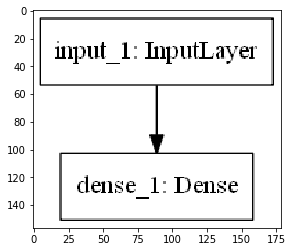

In [27]:
plot_model(model, to_file='model5.png')

# Display the image
data = plt.imread('model5.png')
plt.imshow(data)
plt.show()

In [31]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Create an input layer with 2 columns
input_tensor = Input(shape=(2,))

# Create the first output
output_tensor_1 = Dense(1, activation='linear', use_bias=False)(input_tensor)

# Create the second output (use the first output as input here)
output_tensor_2 = Dense(1, activation='sigmoid', use_bias=False)(output_tensor_1)

# Create a model with 2 outputs
model = Model(input_tensor, [output_tensor_1, output_tensor_2])

In [ ]:
# Import the Adam optimizer
from keras.optimizers import Adam

# Compile the model with 2 losses and the Adam optimzer with a higher learning rate
model.compile(loss=['mean_absolute_error', 'binary_crossentropy'], optimizer=Adam(.01))

# Fit the model to the tournament training data, with 2 inputs and 2 outputs
model.fit(games_tourney_train[['seed_diff', 'pred']],
          [games_tourney_train[['score_diff']], games_tourney_train[['won']]],
          epochs=10,
          verbose=True,
          batch_size=16384)